In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1. Read the csv dataset

In [4]:
df=pd.read_csv("/Users/tuhinpoddar/Desktop/cruise_ship_info.csv")

In [5]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


# Part 2. Calculate the statistics of the dataset using describe

In [6]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [7]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']

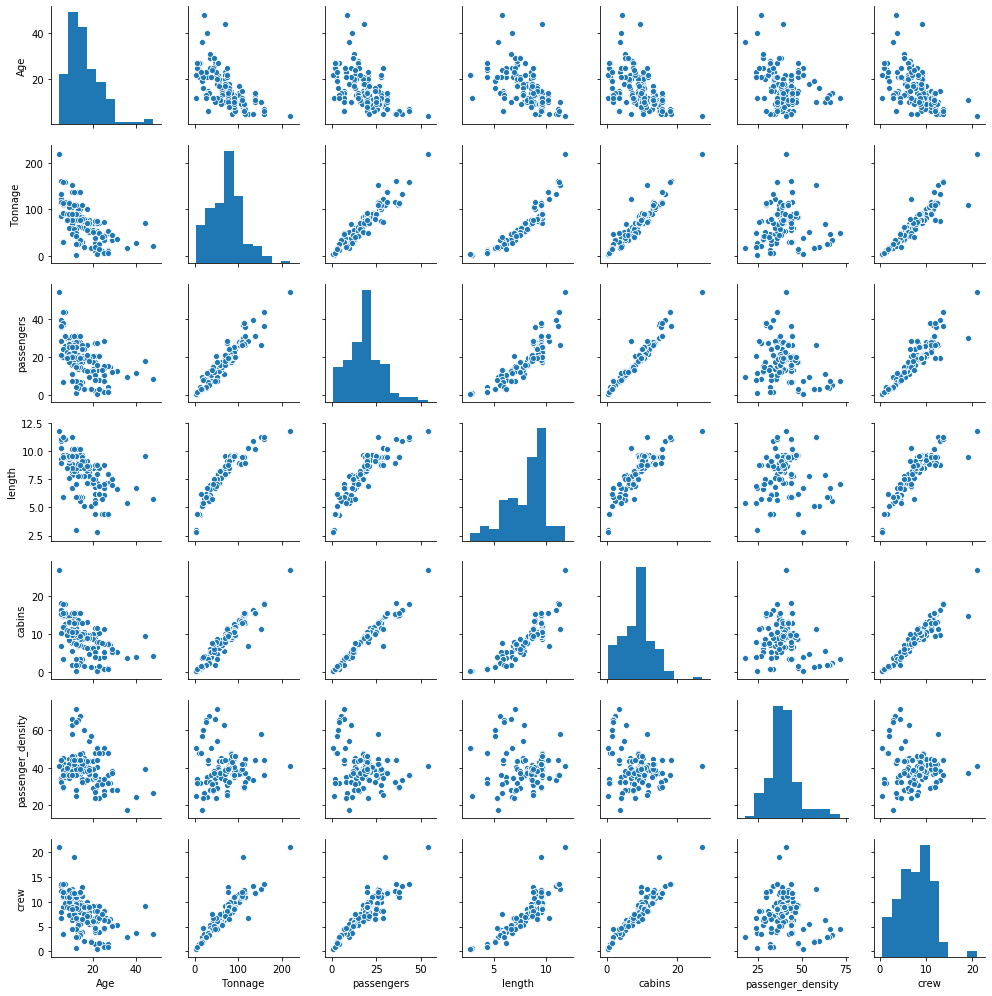

In [9]:
sns.pairplot(df[cols], height=2.0)

#  Main observations from Part 2:

1) It can be seen that the variables are on different scales, for example the Age variable ranges from 16 years to 48 years, while the Tonnage variable ranges from 1 to 230 (probability distribution plots have been included below). It is important that when a regression model is built using these variables, they need to be brought to the same scale either by standardizing or normalizing the data.

2) It can also be observed that the target variable 'crew' correlates well with 4 predictor variables, namely, 'Tonnage', 'passengers', 'length', and 'cabins'.

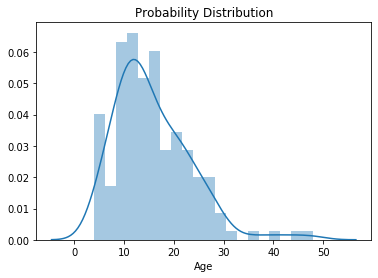

In [10]:
sns.distplot(df['Age'],bins=20)
plt.title('Probability Distribution')
plt.show()

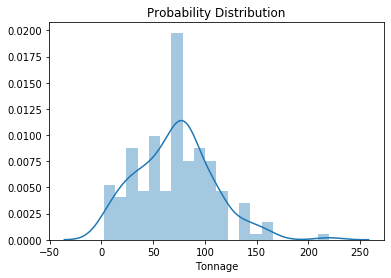

In [11]:
sns.distplot(df['Tonnage'],bins=20)
plt.title('Probability Distribution')
plt.show()

# Part 3. Variable selection to predict crew size

## Part 3(a) Covariance Matrix

In [18]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

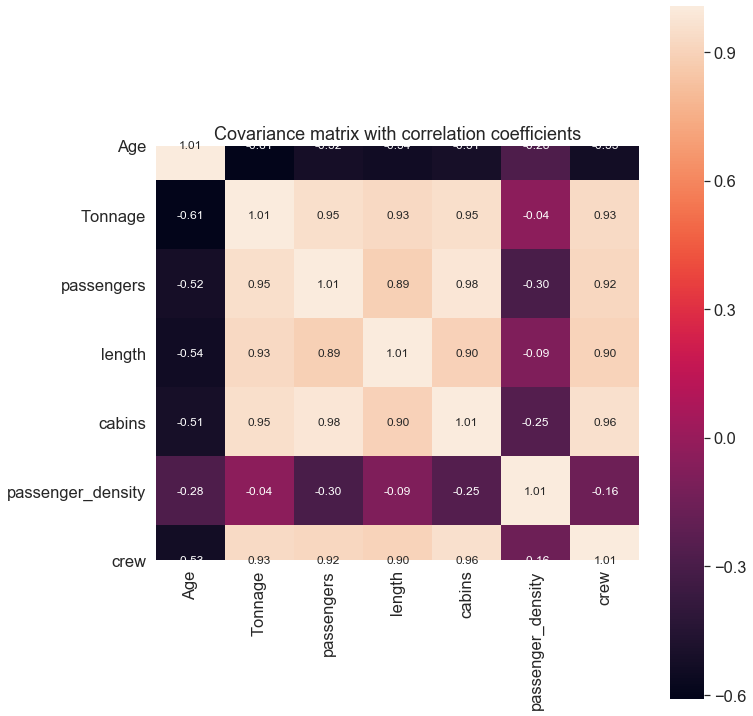

In [16]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(11,11))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix with correlation coefficients')
plt.tight_layout()
plt.show()

## Part 3(b) Selecting important variables (columns)

From the covariance matrix plot, it can be seen that the "crew" variable correlates strongly with 4 predictor variables: "Tonnage", "passengers", "length, and "cabins".

In [19]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']

In [20]:
df[cols_selected].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [23]:
X = df[cols_selected].iloc[:,0:4].values    
Y = df[cols_selected]['crew'].values        # target variable

In [22]:
X.shape

(158, 4)

In [24]:
Y.shape

(158,)

# Part 4. One-hot encoding for categorical features

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0 ,1])
pd.get_dummies(df[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']])

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,12.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df2=pd.get_dummies(df[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']])

In [27]:
df2.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


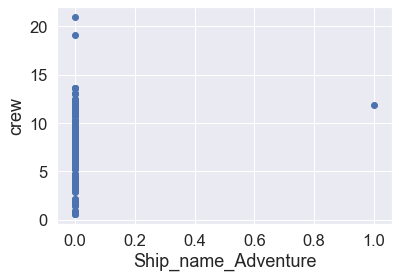

In [28]:
plt.scatter(df2['Ship_name_Adventure'],df2['crew'])
plt.xlabel('Ship_name_Adventure')
plt.ylabel('crew')
plt.show()

## Observations from part 4
In order to build a simplified regression model, we will focus only on ordinal features. A simple model built using only the 4 ordinal features "Tonnage", "passengers", "length, and "cabins" will be easier to interpret.

## Part 5. Data partitioning into training and testing sets

In [29]:
from sklearn.model_selection import train_test_split
X = df[cols_selected].iloc[:,0:4].values     
Y = df[cols_selected]['crew']

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.4, random_state=0)

## Part 6. Building a muilt-regression model
Our machine learning regression model for predicting a ship's "crew" size can be expressed as:

$$ \hat{y}_{i} = w_0 + \sum_{j=1}^{4} X_{ij} w_j $$

In [33]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, Y_train)
Y_train_pred = slr.predict(X_train)
Y_test_pred = slr.predict(X_test)

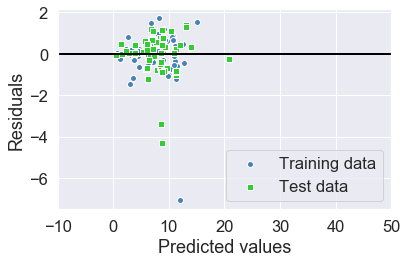

In [34]:
plt.scatter(Y_train_pred,  Y_train_pred - Y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(Y_test_pred,  Y_test_pred - Y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

## Evaluation of regression model

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, Y_train_pred),
        mean_squared_error(Y_test, Y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, Y_train_pred),
        r2_score(Y_test, Y_test_pred)))

MSE train: 0.955, test: 0.889
R^2 train: 0.920, test: 0.928


## Regression coefficients

In [36]:
slr.fit(X_train, Y_train).intercept_

-0.7525074496158375

In [37]:
slr.fit(X_train, Y_train).coef_

array([ 0.01902703, -0.15001099,  0.37876395,  0.77613801])

## Part 7. Feature Standardization, Cross Validation, and Hyper-parameter Tuning

In [39]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']  
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(Y_train[:, np.newaxis]).flatten()

In [40]:
train_score = []
test_score = []

In [41]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.4, random_state=i)
    Y_train_std = sc_y.fit_transform(Y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, Y_train_std)
    Y_train_pred_std=pipe_lr.predict(X_train)
    Y_test_pred_std=pipe_lr.predict(X_test)
    Y_train_pred=sc_y.inverse_transform(Y_train_pred_std)
    Y_test_pred=sc_y.inverse_transform(Y_test_pred_std)
    train_score = np.append(train_score, r2_score(Y_train, Y_train_pred))
    test_score = np.append(test_score, r2_score(Y_test, Y_test_pred))

In [42]:
train_score

array([0.92028261, 0.91733937, 0.94839385, 0.93899476, 0.90621451,
       0.91156903, 0.92726066, 0.94000795, 0.93922948, 0.93629554])

In [43]:
test_score

array([0.92827978, 0.93807946, 0.8741834 , 0.89901199, 0.94781315,
       0.91880183, 0.91437408, 0.89660876, 0.90427477, 0.90139208])

In [44]:
print('R2 train: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))

R2 train: 0.929 +/- 0.013


In [45]:
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

R2 test: 0.912 +/- 0.021
